# NLE Assessed Coursework 1

For this assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about these coursework questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.

In [1]:
candidateno=184521 #this MUST be updated to your candidate number so that you get a unique data sample


In [2]:
#preliminary imports
import sys
sys.path.append('resources')


import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.tokenize import word_tokenize

from sussex_nltk.corpus_readers import AmazonReviewCorpusReader
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import random
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Question 1: Naive Bayes Classification (25 marks)

In this question, you will be considering how a Naive Bayes classifier can be applied to the task of deciding whether sentences are relevant or not relevant to the kitchen domain.

The code below will generate for you two small unique sets of sentences, which you should refer to in your answer to this question.   This question will be marked on the quality of your explanations rather than the quality of your code.

In [3]:
#Do NOT change the code in this cell.

topics=["book","kitchen","dvd","electronics"]
samplesize=20
stop=stopwords.words('english')

trainingsentences=[]
testsentences=[]
cr = AmazonReviewCorpusReader()

for topic in topics:
    random.seed(candidateno)
    if topic == "kitchen":
        key="kitchen"
    else:
        key="not-kitchen"
    topicsentences=[]
    while len(topicsentences)<10:
        topicsentences=[({token.lower():True for token in doc if token not in stop and token.isalpha()},key) for doc in cr.category(topic).sample_sents(samplesize=samplesize) if len(doc)>0]
    testsentences+=topicsentences[0:3]
    trainingsentences+=topicsentences[3:]

random.shuffle(trainingsentences)
mixup=testsentences[:4]+testsentences[5:]
random.shuffle(mixup)
testsentences=[testsentences[4]]+mixup
print("Number of training sentences is {}.  Number of testing sentences is {}".format(len(trainingsentences),len(testsentences)))


Number of training sentences is 56.  Number of testing sentences is 12


In [4]:
print(trainingsentences)

[({'david': True, 'thomson': True, 'writing': True, 'chronological': True, 'account': True, 'hollywood': True, 'movies': True}, 'not-kitchen'), ({'the': True, 'head': True, 'band': True, 'fits': True, 'fixed': True, 'orientation': True}, 'not-kitchen'), ({'the': True, 'story': True, 'great': True, 'job': True, 'explaining': True, 'peter': True, 'became': True}, 'not-kitchen'), ({'it': True, 'brought': True, 'together': True, 'running': True, 'skit': True, 'specifically': True, 'created': True, 'video': True, 'featuring': True, 'cookie': True, 'monster': True, 'newly': True, 'employed': True, 'baker': True, 'expected': True, 'results': True}, 'not-kitchen'), ({'things': True, 'get': True, 'little': True, 'complicated': True, 'reveals': True, 'crush': True, 'milo': True, 'finally': True}, 'not-kitchen'), ({'being': True, 'disappointed': True, 'fit': True, 'koss': True, 'phones': True, 'i': True, 'bought': True, 'slightly': True, 'expensive': True, 'jvc': True}, 'not-kitchen'), ({'but': T

In [5]:
print(testsentences)

[({'you': True, 'add': True, 'water': True, 'get': True, 'sight': True, 'gauge': True, 'cups': True}, 'kitchen'), ({'this': True, 'section': True, 'moved': True, 'bit': True, 'fast': True, 'liking': True, 'i': True, 'think': True, 'slightly': True, 'gentler': True, 'opening': True, 'would': True, 'appropriate': True}, 'not-kitchen'), ({'then': True, 'i': True, 'would': True, 'millionaire': True, 'thanking': True, 'mr': True, 'utterback': True, 'writing': True, 'review': True}, 'not-kitchen'), ({'even': True, 'older': True, 'films': True, 'de': True, 'sica': True, 'capture': True, 'images': True, 'unforgettable': True}, 'not-kitchen'), ({'i': True, 'could': True, 'read': True, 'novel': True}, 'not-kitchen'), ({'so': True, 'go': True, 'local': True, 'store': True, 'check': True, 'purchasing': True, 'online': True}, 'not-kitchen'), ({'i': True, 'use': True, 'vacu': True, 'vin': True, 'wine': True, 'chiller': True, 'size': True}, 'kitchen'), ({'for': True, 'some': True, 'reason': True, 'i'

a) With reference to the sentences generated above, **explain** how a Naive Bayes classifer would be trained to carry out the task of deciding whether sentences are relevant to the kitchen domain.  You do **not** need to build or train a classifier.  However, you should explain the relevant probabilities with reference to examples taken from your samples of sentences.  \[10 marks\]

After building your classifier it needs to be given a set of documents to train itself in order to classify any given documents correctly. For example, a Classifier may be given my set of 56 training sentences, as shown above, which would then be run through the following sequence with the label kitchen:

                Labelled data =[((features),label)] ---> Classifier Encoder ---> model=[parameters]
                
This would result in a model with set parameters that would then be used in the classifier decoder to find if documents are related to kitchens. This is how the process works on a basic level, hoever the encoders workings when it comes to a Naive Bayes Classifier, NBC, is a lot more complicated then the sequence would make you assume.

In a NBC, the encoder takes the given training sentences, aswell as the label, and creates a frequency table which denotes how often a word will appear in the given documents. Using these frequencies a liklihood table can be constructed to see how often two words, appear togther and can the  work out then proabibilty that they're related. If there is a high probabibility when one appears so does the other, then when the classifier finds one word without the other it can state it maybe of the others class. For example, 'ingredients' and 'kitchen' have a strong likliehood of appearing together along with 'smoke and 'sparks', therefore when the sentence :({'no': True, 'smoke': True, 'sparks': True, 'strange': True, 'ingredients': True}, 'kitchen') is given it is regarded as 'kitchen'. However sentences such as: ({'david': True, 'thomson': True, 'writing': True, 'chronological': True, 'account': True, 'hollywood': True, 'movies': True}, 'not-kitchen') are classified as non-kitchen as none of the words in the sentence have a stong probability of bieng of classs 'kitchen'.

For example, with the given sentences, the model is being trained to find if a sentence has something to do with kitchens, to do this it will scan the training documents for the word 'kitchen', which is given as the label. For documents that include 'kitchen' it will then see how often other words appear with the label, for example 'ingredients'. If in 45/56 documents 'kitchen' appears and in 95% of those documents 'ingredients' appears, then there is a high probability that 'ingredients' has something to do with 'kitchen'. This is also reinforced if when documents don't contain 'kitchen' the probability of them including 'ingredients' is also unlikely meaning the chances of 'ingredients' and 'kitchen' being rlated is higher. This would lead to sentences with 'ingredients' in it being classified as 'kitchen' but words like 'era' being classified as 'not-kitchen'. 

If this is the case then the model has been successfully trained.

b) With reference to the sentences generated above, **explain** how a trained Naive Bayes classifier would assign a class to a sentence. \[5 marks\]

                Labelled data =[(features)] ---> Classifier Decoder ---> Labelled data =[((features),label)] 
                
When the 16 test sentences are given to the decoder classifier it uses the trained model that was created from the classifier encoder when training the classifier to classify the sentences into the classes 'kitchen' or 'not-kitchen'. The decoder shall then read the sentences for any words that are included in the likliness table and gather them as a set for each sentence. For each word in the sentence set the conditional probability is calculated, this being the frequency that a word appears and the probabibilty that it relates to the given class e.g. 'kitchen'. This can then be used to calculate probability that the sentence is part of the 'kitchen' class. For example,using the folloeing test setence i cna demonstarte how the classifier would work: ({'you': True, 'add': True, 'water': True, 'get': True, 'sight': True, 'gauge': True, 'cups': True}, 'kitchen'). This sentence has seven key words in totala and out of these seven three, water, cups and gauge, have a high chance of being of class kitchen and one, add, has a medium chance of being related to kitchen. For the example high means 75%+ and medium mean 50%-74% probability of being related to the 'kitchen' class. If this is the case it leaves 3 with a low probability of being related to kitchen. Using this we can give this sentence a probability of between 51%-74% being related to 'kitchen', meaning it is more likely to be related to kitchen then not be and therefore given the class. If this was below 50% then it would be given a class of 'not kitchen' such as can be seen in: ({'when': True, 'phone': True, 'another': True, 'call': True, 'comes': True, 'display': True}, 'not-kitchen').

c) The labels assigned by a Naive Bayes classifier to the sentences contained in the variable `testsentences` above are \['kitchen','not-kitchen','not-kitchen','not-kitchen','kitchen','not-kitchen','kitchen','not-kitchen','not-kitchen','not-kitchen','kitchen','not-kitchen'\].  Using this example to illustrate your answer, **explain** how each of the performance metrics of *accuracy*, *precision*, *recall* and *F1-score* are calculated.  Which of these metrics would you use to choose between classification models in this example?  **Justify your answer**. \[10 marks\]


Using the given 'testsentences', testSentenceClassified (TSC), it is positive to calculate the TP, TN, FP and FN, True Positive, True Negative, False Positive and False Negative, of the predicted data. The classifier classifies 4 kitchens when there should only be 3 kitchens as shown by the original 'testsentences'(TS), because of this it gives a TP of 7 and a FP of 1. Due to this there are 8 'non-kitchen' classes in TSC when there should be 9 as seen in TS. This gives a TN of 17 and FN of 1, these can now be used to calculate the accuracy, precision, recall and F1-Score.

To calculate accuracy we use the formula; TP+TN/N, using this would we would end up with 7+17/26 resulting in an accuracy of 0.92 for our classfier and using the formula TP/TP+FN to calculate the recall we use giving us a recall of 0.875 for our classifier. To calculate precision we would use the formula; TP/TP+FP resulting in a precision of 0.875. To calculate the F1-Score we need to use both the Recall and Precision from above in the following formula; 2PR/P+R with P= precision and R=Recall giving us 2*(0.875*0.875)/0.875*0.875, this would result in a F1 score of 2 for the Classifier.

Out of all of these F1-Score is the most useful as it combines recall and precision which are the two most useful and are equally as important and reliable. This can be shown as accuracy was shown to be 92% accurate as there was only 2 sentences which were classified wrongly. However this could be misleading as shown by the precision and recall, which are both 87.5% which is less than the accuracy as they compare the true positives to the incorrect negatives and positives seperately rather than just the classes that are correct over the total number of classes given,N. In this case the classifier is still very successful, as both Recall and Precison are high which is a sign of a good classifier, however it is possible to have a high accuracy but have a low Recall or Precision. For example, if we had a larger data set of 100 with TP=3, FN=7, FP=3 and TN=87 then accuracy would be at 90% but the recall and precision would be low at 30% and 50%. This proves how misleading this information could be.

When combined, Recall and Precision create a score of 2 overall, which can be compared with other scores of other classifiers to accurately show how successful a classifier is in a single value. This single value is a combination of the 2 most trusted values therefore making this the best value to use.



## Question 2: Training Data for Sentiment Analysis (25 marks)
The objective of this question is to investigate the extent to which performance of a Naive Bayes classifier is affected by the quantity and quality of the training data.  Does more training data mean better performance?  Is performance degraded if we train on one domain and test on another domain?  For example, suppose we train a sentiment classifier on book reviews and then test that classifier on a collection of dvd reviews. Does it perform as well as it would when trained on dvd reviews?

The code below is included to enable you to get pre-formatted training and test data for a given category (evenly split between positive and negative reviews).  In this question, there are marks available for the quality of your programming, your experimental design and your interpretation of results.


In [6]:
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def feature_extract(review):
    """
    Generate a feature representation for a review
    :param review: AmazonReview object
    :return: dictionary of Boolean features
    """
    return {word:True for word in review.words()}

def get_training_test_data(category,ratio=0.7,seed=candidateno):
    """
    Get training and test data for a given category and ratio, pre-formatted for use with NB classifier
    :param category: category of review corpus, one of ["kitchen, "dvd, "book", "electronics"]
    :param ratio: proportion of data to use as training data
    :return: pair of lists 
    """
    reader=AmazonReviewCorpusReader().category(category)
    random.seed(candidateno)
    pos_train, pos_test = split_data(reader.positive().documents(),ratio=ratio)
    neg_train, neg_test = split_data(reader.negative().documents(),ratio=ratio)
    train_data=[(feature_extract(review),'P')for review in pos_train]+[(feature_extract(review),'N') for review in neg_train]
    test_data=[(feature_extract(review),'P')for review in pos_test]+[(feature_extract(review),'N') for review in neg_test]
    return train_data,test_data


In [7]:
#get test traing data and split into ratio lists
Ratio30=[]
Ratio60=[]
Ratio90=[]

Ratio30.append(get_training_test_data('dvd',0.3,184521))
Ratio60.append(get_training_test_data('dvd',0.6,184521))
Ratio90.append(get_training_test_data('dvd',0.9,184521))

Ratio30.append(get_training_test_data('book',0.3,184521))
Ratio60.append(get_training_test_data('book',0.6,184521))
Ratio90.append(get_training_test_data('book',0.9,184521))

Ratio30.append(get_training_test_data('kitchen',0.3,184521))
Ratio60.append(get_training_test_data('kitchen',0.6,184521))
Ratio90.append(get_training_test_data('kitchen',0.9,184521))

Ratio30.append(get_training_test_data('electronics',0.3,184521))
Ratio60.append(get_training_test_data('electronics',0.6,184521))
Ratio90.append(get_training_test_data('electronics',0.9,184521))

a) By varying the amount of training data used, **investigate** the impact of the amount of training data used on the accuracy of a Naive Bayes classifier for each of the four domains: *dvd*, *book*, *kitchen* and *electronics*.  You should use the NaiveBayesClassifier from the `nltk.classify` library.  You should also use a table and an appropriate graph(s) to display your results.  Make sure you **discuss** your results and conclusions. \[8 marks\]

,DVD,Book,Kitchen,Electronics
30,76.928571,73.928571,79.785714,72.500
60,80.625000,73.000000,81.875000,79.625
90,80.000000,75.500000,80.000000,74.000


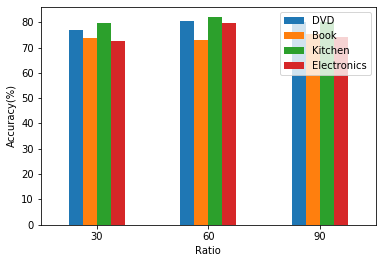

In [8]:
#classOrder=[dvd,book,kitchen,electronics]

#create acc function
def acc(testData,classf):
    i=0
    correctP=0
    for x in testData[1]:
        p=classf.classify(x[0])
        if p == x[1]:
            correctP=correctP+1
        i=i+1
    accuracy =(correctP/i)*100
    return accuracy

classf30=[]
classf60=[]
classf90=[]

#train classifiers
for x in range(4):
    classf30.append(nltk.NaiveBayesClassifier.train(Ratio30[x][0]))
for x in range(4):
    classf60.append(nltk.NaiveBayesClassifier.train(Ratio60[x][0]))
for x in range(4):
    classf90.append(nltk.NaiveBayesClassifier.train(Ratio90[x][0]))

#calculate accuracy for each data set
acc30=[]
acc60=[]
acc90=[]

for x in range(4):
    acc30.append(acc(Ratio30[x],classf30[x]))
    acc60.append(acc(Ratio60[x],classf60[x]))
    acc90.append(acc(Ratio90[x],classf90[x]))

#display graph
import pandas as pd
data={'DVD':[acc30[0],acc60[0],acc90[0]],'Book':[acc30[1],acc60[1],acc90[1]],'Kitchen':[acc30[2],acc60[2],acc90[2]],'Electronics':[acc30[3],acc60[3],acc90[3]]}
df=pd.DataFrame(data,columns = ["DVD","Book","Kitchen","Electronics"], index=[30,60,90])
ax=df.plot.bar(rot=1,xticks=(30,60,90))
ax.set_xlabel("Ratio")
ax.set_ylabel("Accuracy(%)")
display(df)

The data suggests a trend of, the higher the ratio the higher the accuracy in most cases with a few exceptions such as 0.6 electronics and kitchen.

b) For each possible combination of source and target domain, **evaluate** the accuracy of a Naive Bayes classifier trained on the source domain and tested on the target domain.  There are four domains so there are 16 possible combinations you should consider.  You should use a table and an appropriate graph(s) to display your results.  Make sure you **discuss** your results and conclusions. \[8 marks\]

,DVD,Books,Kitchen,Electronics
Books,68.625,73.000,65.875,64.500
DVD,80.625,69.250,70.875,65.625
Electronics,66.875,58.375,76.125,79.625
Kitchen,65.500,59.625,81.875,76.625


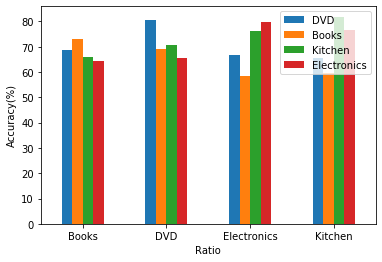

In [9]:
#classifiers for each class
classfOrder=["DVD","Books","Kitchen","Electronics"]
classf={}
i=0

for y in classfOrder:
    classf[y]=(nltk.NaiveBayesClassifier.train(Ratio60[i][0]))
    i=i+1
    
#run through each of the possibilities
data={}
for i in classfOrder:
    temp={}
    for x in range(4):
        temp[classfOrder[x]]=acc(Ratio60[x],classf[i])
    data[i]=temp
#create table
df=pd.DataFrame(data,columns=("DVD","Books","Kitchen","Electronics"))
ax=df.plot.bar(rot=0)
ax.set_xlabel("Ratio")
ax.set_ylabel("Accuracy(%)")
display(df)

From my analysis of the data I can say that the highest accuracies of the classifiers are always on the data that they were trained for, for example a DVD classifier on DVD data has an accuracy of 80.625% but when the classifier is used on other data the accuracy drops to the mid 60's. This trend is similar through out the rest of the data but this is to be expected. The books classifier seemed to have the lowest accuarcy overall but this maybe due to the books test data being smaller in size then the rest or the test data wasn't very varied. This classifier also shows the lowest accuracy of 58.375% when used on electronics which matches the trend from the previous question where the accuracy always seemed lower then the competition always staying the 70-79% range when others where 80%+.

c) Adapt your code so that you can build and use a training set built from multiple categories.  Now **investigate** how having a mixture of source domains affects the accuracy of the Naive Bayes classifier on the target domain.  Make sure you control for or consider how much any improvements are due to the quantity of the training data. \[9 marks\]

,DVD,Book,Kitchen,Electronics
60,81.125,77.875,81.25,78.625


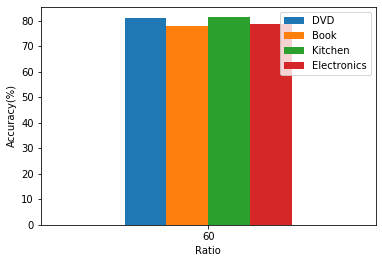

In [10]:
import itertools
import functools
from functools import reduce

#gather all data into one variable
data=reduce(lambda x,y:x+y[0],Ratio60,[])

#train classifier with all data
classf=(nltk.NaiveBayesClassifier.train(data))

#accuracy test
accuracyList=[]
for x in range(4):
    accuracyList.append(acc(Ratio60[x],classf))
    
#display graph
import pandas as pd
data={'DVD':[accuracyList[0]],'Book':[accuracyList[1]],'Kitchen':[accuracyList[2]],'Electronics':[accuracyList[3]]}
df=pd.DataFrame(data,columns = ["DVD","Book","Kitchen","Electronics"], index=[60])
ax=df.plot.bar(rot=1)
ax.set_xlabel("Ratio")
ax.set_ylabel("Accuracy(%)")
display(df)

Use the code below to verify that the length of your submission does not exceed 2000 words.

In [12]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 1202

import io
from nbformat import current

filepath="a1.ipynb"
question_count=748

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 1391
